# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Checking image sizes
print('Image Shape - Training set: {}'.format(X_train[0].shape))
print('Image Shape - Validation set: {}'.format(X_valid[0].shape))
print('Image Shape - Test set: {}'.format(X_test[0].shape))

Image Shape - Training set: (32, 32, 3)
Image Shape - Validation set: (32, 32, 3)
Image Shape - Test set: (32, 32, 3)


In [2]:
#from sklearn.model_selection import train_test_split

## Isolating part of training set for future validation (20% here)
#X_train, X_valid,  y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [3]:
import numpy as np

# Reading table of signs and assigning to dictionary
sign_names = np.genfromtxt ('signnames.csv', delimiter=',', dtype=str, skip_header=1)
sign_names_d = {sign_names[k][0] : sign_names[k][1] for k in range(len(sign_names))}

In [4]:
# To visualize sign image given index
def visualize_sign_index(feature_set, label_set, sign_names_d, index, cmap=None):
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    image = feature_set[index].squeeze()
    
    # Printing image index, sign image, sign label and name
    print('Index picked:', index)
    print('Label:', label_set[index], ' - ', sign_names_d[str(label_set[index])])
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap=cmap)
    
# To visualize randomly picked sign image given label
def visualize_sign_label(feature_set, label_set, sign_names_d, label, cmap=None):
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    # Getting images with label
    indexes = np.where(label_set==label)
    
    # Picking index at random
    index = indexes[0][random.randint(0, len(indexes[0]))]
    
    image = feature_set[index].squeeze()
    
    # Printing image index, sign image, sign label and name
    print('Index picked:', index)
    print('Label:', label_set[index], ' - ', sign_names_d[str(label_set[index])])
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap=cmap)

Index picked: 32072
Label: 2  -  Speed limit (50km/h)


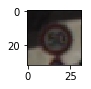

In [5]:
import random

# Visualizing image picked randomly
random_index = random.randint(0, len(X_train))
visualize_sign_index(X_train, y_train, sign_names_d, random_index)

Index picked: 15476
Label: 38  -  Keep right


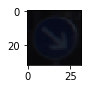

In [6]:
# Visualizing image picked randomly for given label
l = 38 #(keep right sign)
visualize_sign_label(X_train, y_train, sign_names_d, l)

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [7]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape
x_size = image_shape[0]
y_size = image_shape[1]
n_colors = image_shape[2]

# TODO: How many unique classes/labels there are in the dataset.
all_classes = np.concatenate((y_train, y_valid, y_test), axis=0)
unique_classes = np.unique(all_classes)
n_classes = len(unique_classes)

print("Number of training examples =", n_train)
print("Number of validation  examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation  examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [8]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

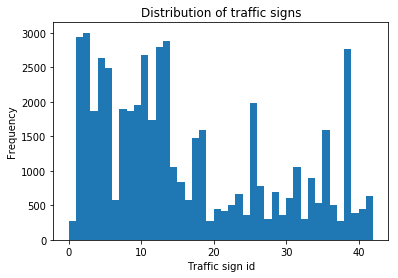

In [9]:
# Plotting distribution of traffic signs (output classes)
plt.hist(all_classes, bins=unique_classes)
plt.title('Distribution of traffic signs')
plt.xlabel('Traffic sign id')
plt.ylabel('Frequency')
plt.show()

Distribution of pixel means


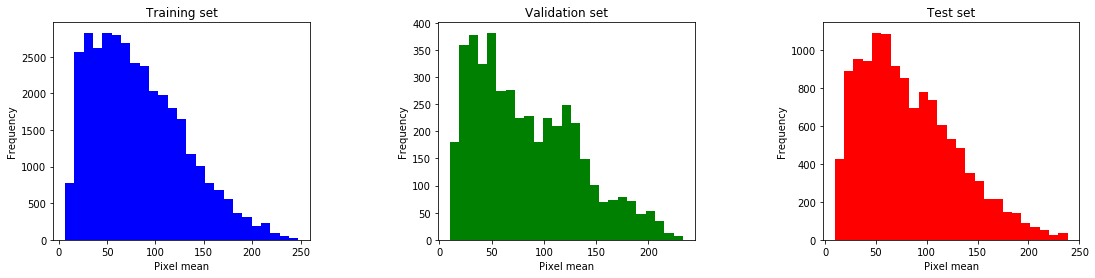

In [10]:
# Plotting distribution of image means

# Calculating mean of pixel for each set
X_train_mean = []
for k in range(len(X_train)):
    X_train_mean.append(np.mean(X_train[k]))

X_valid_mean = []
for k in range(len(X_valid)):
    X_valid_mean.append(np.mean(X_valid[k]))

X_test_mean = []
for k in range(len(X_test)):
    X_test_mean.append(np.mean(X_test[k]))

# Plotting
train_plot = plt.subplot(131)
train_plot.hist(X_train_mean, bins=25, facecolor='blue')
train_plot.set_title('Training set')
train_plot.set_xlabel('Pixel mean')
train_plot.set_ylabel('Frequency')

valid_plot = plt.subplot(132)
valid_plot.hist(X_valid_mean, bins=25, facecolor='green')
valid_plot.set_title('Validation set')
valid_plot.set_xlabel('Pixel mean')
valid_plot.set_ylabel('Frequency')

test_plot = plt.subplot(133)
test_plot.hist(X_test_mean, bins=25, facecolor='red')
test_plot.set_title('Test set')
test_plot.set_xlabel('Pixel mean')
test_plot.set_ylabel('Frequency')

#plt.title('Distribution of means')
print('Distribution of pixel means')
plt.subplots_adjust(left=None, bottom=None, right=2.5, top=None, wspace=0.5, hspace=None)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [11]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

In [12]:
# Neutral function
def neutral(image_data):
    return image_data

# Conversion to gray scale
def image_gray_old(image_data):
    output = []
    for k in range(len(image_data)):
        im = np.dot(image_data[k][...,:3], [0.299, 0.587, 0.114])
        im = np.expand_dims(im, axis=2)
        output.append(im)
    return output

def image_gray(image_data):
    import cv2
    output = []
    for k in range(len(image_data)):
        #im = cv2.cvtColor(image_data[k], cv2.COLOR_BGR2GRAY)
        im = cv2.cvtColor(image_data[k], cv2.COLOR_RGB2GRAY)
        im = np.expand_dims(im, axis=2)
        output.append(im)
    return output

# Min-Max scaling
def image_ab(image_data):
    # Normalizing image data to a range of [0.1, 0.9]
    a = 0.1
    b = 0.9
    mi = np.min(image_data)
    ma = np.max(image_data)
    output = a + (image_data - mi) * (b - a) / (ma - mi)
    return output

# Zero-mean scaling
def image_z(image_data):
    # Normalizing image data as zero-centered with std=1
    output = []
    for k in range(len(image_data)):
        m = np.mean(image_data[k])
        s = np.std(image_data[k])
        im = (image_data[k] - m) / s
        output.append(im)
    return output

In [13]:
# Selecting methods
#gray_function = neutral
gray_function = image_gray

#norm_function = neutral
norm_function = image_ab
#norm_function = image_z

# Running pre-processing
X_train_pre = norm_function(gray_function(X_train))
X_valid_pre = norm_function(gray_function(X_valid))
X_test_pre = norm_function(gray_function(X_test))

# Adjusting parameters for later use
if gray_function != neutral:
    n_colors = 1
    cmap = 'gray'
else:
    cmap = None

Max of original image: 155 ; Min of original image: 15
Mean of original image: 64.60319010416667
Standard deviation of original image: 42.10491642574616

Max of processed image: 0.5698412698412698 ; Min of processed image: 0.14126984126984127
Mean of processed image: 0.29811817956349207
Standard deviation of processed image: 0.13577218675612887

Index picked: 32072
Label: 2  -  Speed limit (50km/h)


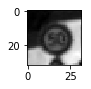

In [14]:
# Testing pre-processing with image previously selected
assert X_train_pre[random_index].shape[0] == X_train[random_index].shape[0] and X_train_pre[random_index].shape[1] == X_train[random_index].shape[1], 'NOK: format not preserved'
print('Max of original image: {} ; Min of original image: {}'.format(np.max(X_train[random_index]), np.min(X_train[random_index])))
print('Mean of original image: {}'.format(np.mean(X_train[random_index])))
print('Standard deviation of original image: {}'.format(np.std(X_train[random_index])))
print()
print('Max of processed image: {} ; Min of processed image: {}'.format(np.max(X_train_pre[random_index]), np.min(X_train_pre[random_index])))
print('Mean of processed image: {}'.format(np.mean(X_train_pre[random_index])))
print('Standard deviation of processed image: {}'.format(np.std(X_train_pre[random_index])))
print()

# Visualizing
visualize_sign_index(X_train_pre, y_train, sign_names_d, random_index, cmap)

### Model Architecture

In [15]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [16]:
import tensorflow as tf

# Defining number of epochs and batch size
EPOCHS = 10
BATCH_SIZE = 128

In [17]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    l1_input_depth = n_colors
    l1_output_depth = 6
    l1_filter_h = 5
    l1_filter_w = 5
    conv1_W = tf.Variable(tf.truncated_normal(shape=(l1_filter_h, l1_filter_w, l1_input_depth, l1_output_depth), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(l1_output_depth))
    l1_strides_k = 1
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, l1_strides_k, l1_strides_k, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    l1_pool_k = 2
    conv1 = tf.nn.max_pool(conv1, ksize=[1, l1_pool_k, l1_pool_k, 1], strides=[1, l1_pool_k, l1_pool_k, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    l2_input_depth = l1_output_depth
    l2_output_depth = 16
    l1_filter_h = 5
    l1_filter_w = 5
    conv2_W = tf.Variable(tf.truncated_normal(shape=(l1_filter_h, l1_filter_h, l2_input_depth, l2_output_depth), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    l2_strides_k = 1
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, l2_strides_k, l2_strides_k, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    l2_pool_k = 2
    conv2 = tf.nn.max_pool(conv2, ksize=[1, l2_pool_k, l2_pool_k, 1], strides=[1, l2_pool_k, l2_pool_k, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    l3_input_size = 400
    l3_output_size = 120
    fc1_W = tf.Variable(tf.truncated_normal(shape=(l3_input_size, l3_output_size), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(l3_output_size))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1 = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    l4_input_size = 120
    l4_output_size = 84
    fc2_W = tf.Variable(tf.truncated_normal(shape=(l4_input_size, l4_output_size), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(l4_output_size))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2 = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    l5_input_size = 84
    l5_output_size = n_classes
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(l5_input_size, l5_output_size), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(l5_output_size))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [18]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [19]:
import numpy as np

# Data augmentation on training set

# Selecting p% of training data for rotation
p = 0.4
indices = np.random.choice(n_train, int(np.ceil(p * n_train)))

X_train_rotated = X_train[indices]
y_train_rotated = y_train[indices]
print('{} images selected from training set for rotation.'.format(len(X_train_rotated)))


# Selecting p% of training data for translation
p = 0.4
indices = np.random.choice(n_train, int(np.ceil(p * n_train)))

X_train_translated = X_train[indices]
y_train_translated = y_train[indices]
print('{} images selected from training set for translation.'.format(len(X_train_translated)))

13920 images selected from training set for rotation.
13920 images selected from training set for translation.


Index picked: 209
Label: 14  -  Stop


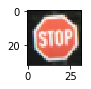

In [20]:
# Visualizing random image before augmentation (rotation)
import random
random_index_rot = random.randint(0, len(X_train_rotated))
visualize_sign_index(X_train_rotated, y_train_rotated, sign_names_d, random_index_rot)

Index picked: 1788
Label: 3  -  Speed limit (60km/h)


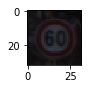

In [21]:
# Visualizing random image before augmentation (translation)
import random
random_index_trs = random.randint(0, len(X_train_translated))
visualize_sign_index(X_train_translated, y_train_translated, sign_names_d, random_index_trs)

In [22]:
# Augmenting training data

# Translation
def image_translate(image_data):
    import random
    import cv2
    output = []
    for k in range(len(image_data)):
        # Getting image size
        im = image_data[k]
        rows = im.shape[0]
        cols = im.shape[1]
        
        # Generating random translation factors
        trans_factor = 0.2
        trans_x = np.random.choice(range(0, int(trans_factor * rows), 1))
        trans_y = np.random.choice(range(0, int(trans_factor * cols), 1))
        sign = np.random.choice([-1, 1], p=[0.5, 0.5])
        
        # Running translation
        M = np.float32([[1, 0, sign * trans_x], [0, 1, sign * trans_y]])
        im = cv2.warpAffine(im, M, (cols, rows))
        
        output.append(im)
    return output

# Rotation
def image_rotate(image_data):
    import random
    import cv2
    output = []
    for k in range(len(image_data)):
        # Getting image size
        im = image_data[k]
        rows = im.shape[0]
        cols = im.shape[1]
        
        # Generating random rotation angle
        angle = np.random.choice(range(5, 15, 1))
        sign = np.random.choice([-1, 1], p=[0.5, 0.5])
        
        # Running rotation
        M = cv2.getRotationMatrix2D((cols / 2, rows / 2), sign * angle, 1)
        im = cv2.warpAffine(im, M, (cols, rows))
        
        output.append(im)
    return output

X_train_rotated = image_rotate(X_train_rotated)
X_train_translated = image_translate(X_train_translated)

Index picked: 209
Label: 14  -  Stop


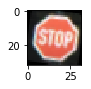

In [23]:
# Visualizing augmented image (rotation)
visualize_sign_index(X_train_rotated, y_train_rotated, sign_names_d, random_index_rot)

Index picked: 1788
Label: 3  -  Speed limit (60km/h)


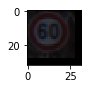

In [24]:
# Visualizing augmented image (translation)
visualize_sign_index(X_train_translated, y_train_translated, sign_names_d, random_index_trs)

Index picked: 209
Label: 14  -  Stop


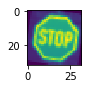

In [25]:
# Applying gray scale and normalization
X_train_rotated = norm_function(gray_function(X_train_rotated))
X_train_translated = norm_function(gray_function(X_train_translated))

# Visualizing pre-processed augmented image
visualize_sign_index(X_train_rotated, y_train_rotated, sign_names_d, random_index_rot)

Index picked: 1788
Label: 3  -  Speed limit (60km/h)


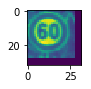

In [26]:
# Visualizing pre-processed augmented image
visualize_sign_index(X_train_translated, y_train_translated, sign_names_d, random_index_trs)

In [27]:
# Adding augmented data to training set
X_train_augm = np.concatenate((X_train_pre, X_train_rotated, X_train_translated), axis=0)
y_train_augm = np.concatenate((y_train, y_train_rotated, y_train_translated), axis=0)
print('{} images in augmented training set.'.format(len(X_train_augm)))

62639 images in augmented training set.


In [28]:
# Instantiating placeholders for batches of images and labels
x = tf.placeholder(tf.float32, (None, x_size, y_size, n_colors))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [29]:
# Defining training pipeline

# Hyper-parameters: learning rate and L2-regularization coefficient
rate = 0.001
l2_beta = 0.01

# Generating logits from network
logits = LeNet(x)

# Calculating cross-entropy
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)

# Applying L2-regularization (to prevent overfitting by penalizing large weights)
l2_regul = cross_entropy + l2_beta * tf.nn.l2_loss(logits)

# Calculating loss
loss_operation = tf.reduce_mean(l2_regul)

# Defining loss optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = rate)

# Running pipeline
training_operation = optimizer.minimize(loss_operation)

In [30]:
# Evaluating model
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = X_data[offset:end], y_data[offset:end]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [31]:
# Training model
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_augm)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_augm, y_train_augm = shuffle(X_train_augm, y_train_augm)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_augm[offset:end], y_train_augm[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_pre, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './traffic_signs')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.734

EPOCH 2 ...
Validation Accuracy = 0.865

EPOCH 3 ...
Validation Accuracy = 0.885

EPOCH 4 ...
Validation Accuracy = 0.900

EPOCH 5 ...
Validation Accuracy = 0.915

EPOCH 6 ...
Validation Accuracy = 0.923

EPOCH 7 ...
Validation Accuracy = 0.932

EPOCH 8 ...
Validation Accuracy = 0.935

EPOCH 9 ...
Validation Accuracy = 0.930

EPOCH 10 ...
Validation Accuracy = 0.941

Model saved


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

### Predict the Sign Type for Each Image

In [32]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

11 - Right-of-way at the next intersection


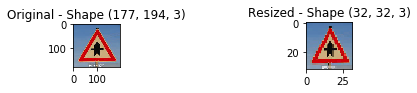


14 - Stop


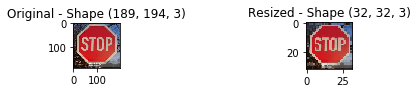


28 - Children crossing


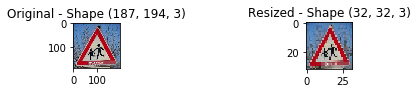


2 - Speed limit (50km/h)


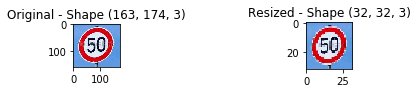


38 - Keep right


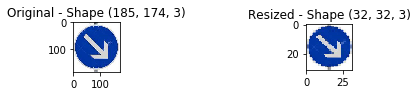



Number of test images:  5


In [33]:
import numpy as np
import cv2
import os

%matplotlib inline

X_test_2 = []
y_test_2 = []

dirname = 'test_images'
for filename in os.listdir(dirname):
    # Loading image file
    filename = dirname + os.sep + filename
    #image = Image.open(filename)
    
    # Getting label from name (first)
    label_id = os.path.split(filename)[1].split('_')[0]
    
    # Getting label description from dictionary
    label_desc = label_id + ' - ' + sign_names_d[label_id]
    #print(label_desc)
    
    # Converting from BGR to RGB (Opencv images come as BGR by default instead of RGB)
    image = cv2.imread(filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Preparing plotting - Original image
    plt.figure(figsize=(5,5))
    orig_plot = plt.subplot(121)
    orig_plot.set_title('Original - Shape ' + str(image.shape))
    orig_plot.imshow(image)
    
    if int(label_id) <= n_classes:
        # Resizing to 32x32
        image = cv2.resize(image, (32,32))
        
        # Appending to second test set
        X_test_2.append(image)
        y_test_2.append(int(label_id))
        
        # Preparing plotting - Resized image
        resized_plot = plt.subplot(122)
        resized_plot.set_title('Resized - Shape ' + str(image.shape))
        resized_plot.imshow(image)
        
        # Plotting
        print(label_desc)
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=4.0, hspace=None)
        plt.show()
        
    print()

# Getting number of test examples
n_test = len(X_test_2)
assert n_test == len(y_test_2), 'Labels do not match images.'
print()
print('Number of test images: ', n_test)

In [34]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [35]:
assert logits != None, 'Network to be trained first.'

In [36]:
# Pre-processing test images downloaded on the web
X_test_def = norm_function(gray_function(X_test_2))
y_test_def = y_test_2

# Running predictions on images downloaded on the web
with tf.Session() as sess:
    # Reloading saved model
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    # Running model on images
    softmax = tf.nn.softmax(logits)
    
    # Getting prediction with highest probability (k = 1 in tf.nn.top_k)
    output = sess.run(softmax, feed_dict={x: X_test_def})
    values, indices = tf.nn.top_k(output, 1)
    probas = sess.run(values)
    predictions = sess.run(indices)
    
    # Printing prediction
    for k in range(len(X_test_def)):
        print('Image {} with label {} - {}'.format(k, y_test_def[k], sign_names_d[str(y_test_def[k])]))
        print('Prediction = {}'.format(predictions[k][0]))
        if predictions[k][0] == y_test_def[k]:
            print('--> Prediction agrees with actual label.')
        else:
            print('--> Prediction wrong.')
        print()

Image 0 with label 11 - Right-of-way at the next intersection
Prediction = 11
--> Prediction agrees with actual label.

Image 1 with label 14 - Stop
Prediction = 14
--> Prediction agrees with actual label.

Image 2 with label 28 - Children crossing
Prediction = 28
--> Prediction agrees with actual label.

Image 3 with label 2 - Speed limit (50km/h)
Prediction = 2
--> Prediction agrees with actual label.

Image 4 with label 38 - Keep right
Prediction = 38
--> Prediction agrees with actual label.



### Analyze Performance

In [37]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [38]:
# Calculating accuracy on images downloaded from the web
with tf.Session() as sess:
    # Reloading saved model
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    # Calculating accuracy
    test_accuracy = evaluate(X_test_def, y_test_def)
    print('Number of images processed: ', len(X_test_def))
    print('Test accuracy = {0:.2f}%'.format(test_accuracy * 100))

Number of images processed:  5
Test accuracy = 100.00%


In [39]:
# Pre-processing images from test set provided for project
X_test_def = norm_function(gray_function(X_test))
y_test_def = y_test

# Calculating accuracy on test set provided for project
with tf.Session() as sess:
    # Reloading saved model
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    # Calculating accuracy
    test_accuracy = evaluate(X_test_def, y_test_def)
    print('Number of images processed: ', len(X_test_def))
    print('Test accuracy = {0:.2f}%'.format(test_accuracy * 100))

Number of images processed:  12630
Test accuracy = 92.98%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [40]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [41]:
# Pre-processing test images downloaded on the web
X_test_def = norm_function(gray_function(X_test_2))
y_test_def = y_test_2

# Running predictions on images downloaded on the web
with tf.Session() as sess:
    # Reloading saved model
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    # Running model on images
    softmax = tf.nn.softmax(logits)
    
    # Getting predictions with 5 highest probabilities (k = 5 in tf.nn.top_k)
    output = sess.run(softmax, feed_dict={x: X_test_def})
    values_indices = tf.nn.top_k(output, 5)
    probas_indices = sess.run(values_indices)
    print('Probabilities: ')
    print(probas_indices)

Probabilities: 
TopKV2(values=array([[ 0.05167377,  0.02343663,  0.02301729,  0.02286875,  0.02281614],
       [ 0.03644363,  0.02911427,  0.02346484,  0.02339604,  0.02332812],
       [ 0.03822012,  0.02360993,  0.0234372 ,  0.02341032,  0.02317869],
       [ 0.04811666,  0.02345644,  0.02289112,  0.02283588,  0.02275841],
       [ 0.04461398,  0.02333484,  0.02327715,  0.02311659,  0.0230398 ]], dtype=float32), indices=array([[11, 33, 24,  5, 26],
       [14,  1, 36, 27,  4],
       [28, 20, 27, 11, 23],
       [ 2,  3,  1, 32, 20],
       [38, 32, 12,  5,  2]]))


Image 0 with label 11 - Right-of-way at the next intersection


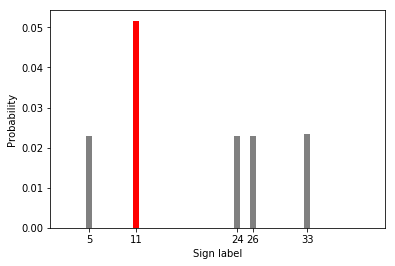


Image 1 with label 14 - Stop


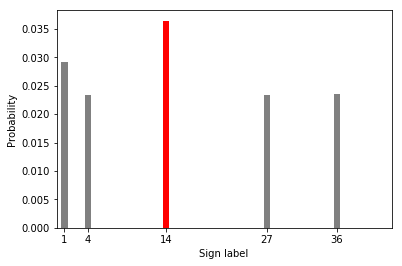


Image 2 with label 28 - Children crossing


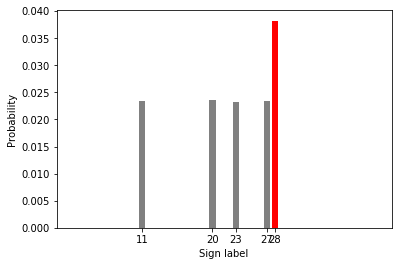


Image 3 with label 2 - Speed limit (50km/h)


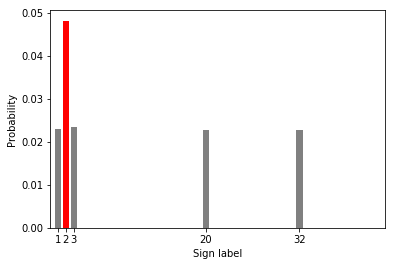


Image 4 with label 38 - Keep right


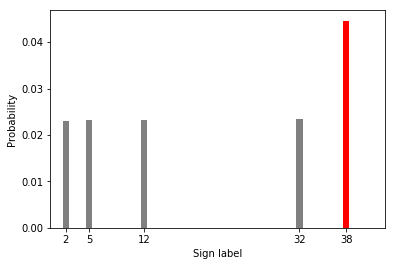

In [42]:
# Pre-processing test images downloaded on the web
X_test_def = norm_function(gray_function(X_test_2))
y_test_def = y_test_2

# Running predictions on images downloaded on the web
with tf.Session() as sess:
    # Reloading saved model
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    # Running model on images
    softmax = tf.nn.softmax(logits)
    
    # Getting prediction with highest probability (k = 1 in tf.nn.top_k)
    output = sess.run(softmax, feed_dict={x: X_test_def})
    values, indices = tf.nn.top_k(output, 5)
    probas = sess.run(values)
    predictions = sess.run(indices)
    
    for k in range(len(X_test_def)):
        print('Image {} with label {} - {}'.format(k, y_test_def[k], sign_names_d[str(y_test_def[k])]))
        
        plt_colors = ['grey' if (x < max(probas[k])) else 'red' for x in probas[k]]
        plt_weight = ['' if (x < max(probas[k])) else 'bold' for x in probas[k]]
        plt.bar(predictions[k], probas[k], color=plt_colors)
        
        plt.xlabel('Sign label')
        plt.ylabel('Probability')
        plt.xticks(predictions[k])
        plt.xlim(0, n_classes)
        
        plt.show()
        print()

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 